<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

In [ ]:
#1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

In [11]:
df['grupo'].unique()


array(['Grupo_1', 'Grupo_2', 'Grupo_3', 'Grupo_4'], dtype=object)

In [20]:
mask_1 = (df['grupo']=='Grupo_1')
mask_2 = (df['grupo']=='Grupo_2')
mask_3 = (df['grupo']=='Grupo_3')
mask_4 = (df['grupo']=='Grupo_4')


<AxesSubplot:xlabel='x', ylabel='y'>

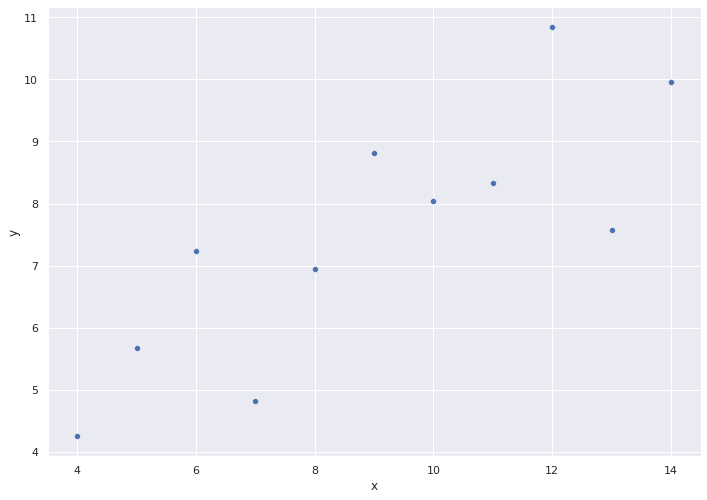

In [23]:
#grafico de Grupo_1
sns.scatterplot(
    x='x',
    y='y',
    data=df[mask_1],
    ci=None
)

<AxesSubplot:xlabel='x', ylabel='y'>

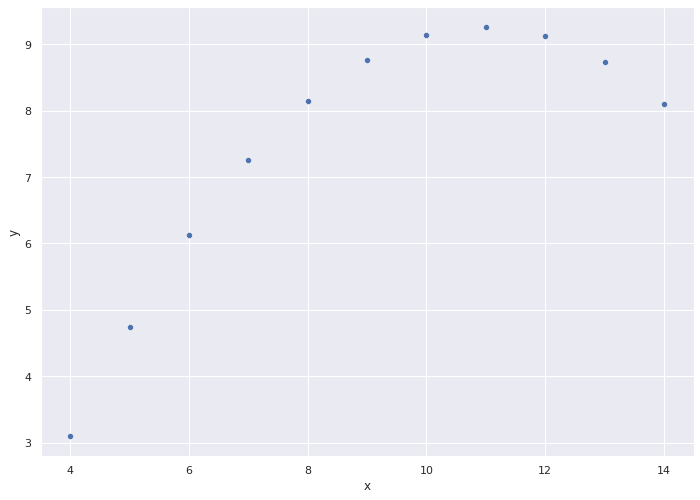

In [24]:
#grafico de Grupo_2
sns.scatterplot(
    x='x',
    y='y',
    data=df[mask_2],
    ci=None
)

<AxesSubplot:xlabel='x', ylabel='y'>

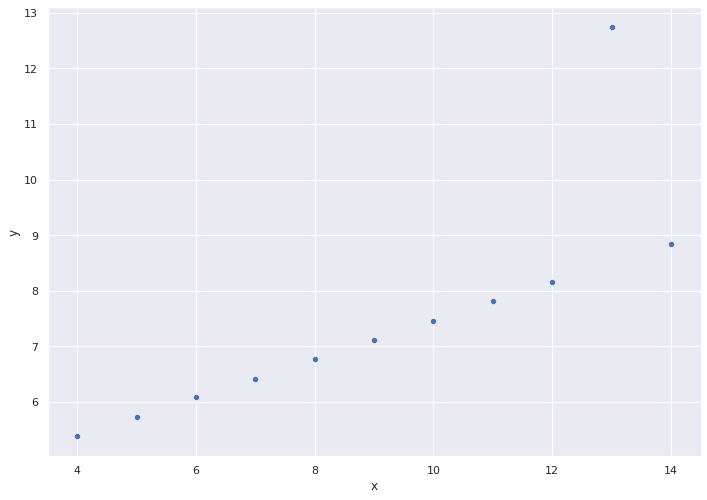

In [25]:
#grafico de Grupo_3
sns.scatterplot(
    x='x',
    y='y',
    data=df[mask_3],
    ci=None
)

<AxesSubplot:xlabel='x', ylabel='y'>

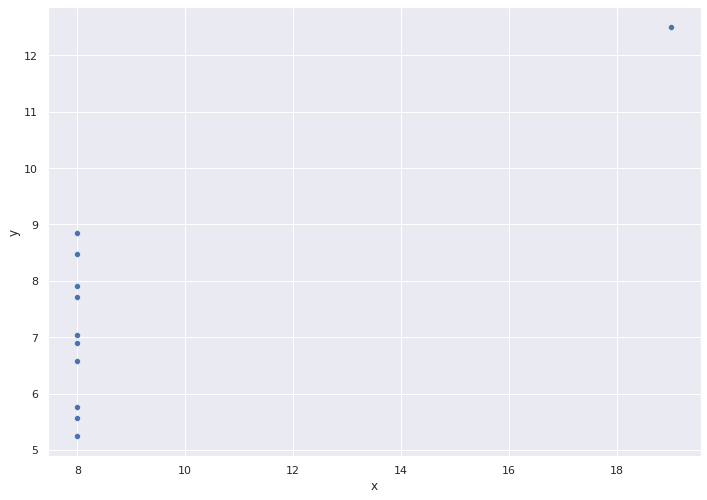

In [26]:
#grafico de Grupo_4
sns.scatterplot(
    x='x',
    y='y',
    data=df[mask_4],
    ci=None
)

In [ ]:
#2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [29]:
#descripcion del grupo 1
df[mask_1].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [30]:
#descripcion del grupo 2
df[mask_2].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [31]:
#descripcion del grupo 3
df[mask_3].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [32]:
#descripcion del grupo 4
df[mask_4].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


In [ ]:
#Lo observado en las tablas de descripciones es que los datos de los cuatro grupos son iguales (o casi identicos) en: 
#numero de datos, promedio y desviacion estandar.  

In [ ]:
#3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
#4. Calcule los resultados de las métricas para cada grupo. Interprete.

In [76]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from metrics_regression import *
from sklearn.metrics import r2_score
#Grupo1

X=df[mask_1][['x']]
y=df[mask_1]['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model_rl = LinearRegression() 
model_rl.fit(X_train, y_train)

beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)



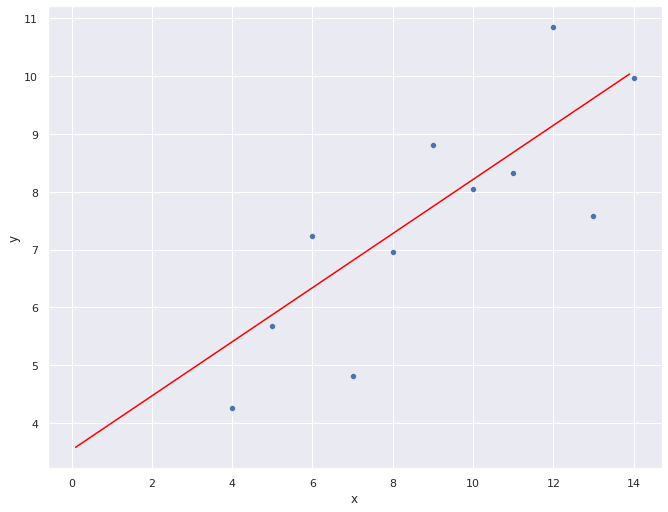

In [70]:
Y_predict = model_rl.predict(X_test)
Y_predict

beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]

df1=df[mask_1]

x_range = np.arange(0.1,14,0.1)
        
        
df1_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df1 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df1, ax=ax)
sns.lineplot(x='x', y='y_true', data=df1_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [80]:
df1_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df1_metrics = summary_metrics(df1_temp)
df1_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el grupo 1:\n')
print(df1_metrics)


Metricas para el grupo 1:

      mae     mse    rmse   mape   maape   wmape   mmape   smape      r2
0  0.8871  1.3933  1.1804  0.167  0.1599  0.1324  0.1399  0.1429  0.3316


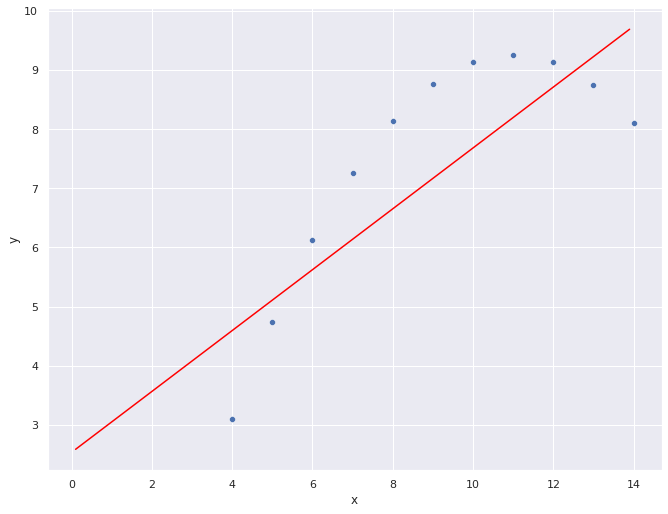

In [82]:
#Grupo 2

X=df[mask_2][['x']]
y=df[mask_2]['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model_rl = LinearRegression() 
model_rl.fit(X_train, y_train)

beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

Y_predict = model_rl.predict(X_test)
Y_predict

beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]

df1=df[mask_2]

x_range = np.arange(0.1,14,0.1)
        
        
df1_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df1 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df1, ax=ax)
sns.lineplot(x='x', y='y_true', data=df1_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [84]:
df1_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df1_metrics = summary_metrics(df1_temp)
df1_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el grupo 2:\n')
print(df1_metrics)


Metricas para el grupo 2:

      mae     mse    rmse    mape   maape  wmape   mmape   smape      r2
0  1.2246  1.5348  1.2389  0.1507  0.1495  0.149  0.1341  0.1635 -1.2912


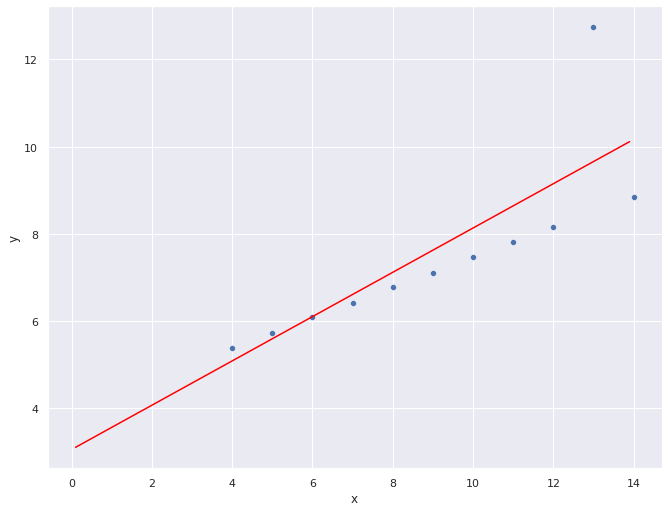

In [85]:
#grupo 3

X=df[mask_3][['x']]
y=df[mask_3]['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model_rl = LinearRegression() 
model_rl.fit(X_train, y_train)

beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

Y_predict = model_rl.predict(X_test)
Y_predict

beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]

df1=df[mask_3]

x_range = np.arange(0.1,14,0.1)
        
        
df1_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df1 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df1, ax=ax)
sns.lineplot(x='x', y='y_true', data=df1_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [86]:
df1_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df1_metrics = summary_metrics(df1_temp)
df1_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el grupo 3:\n')
print(df1_metrics)


Metricas para el grupo 3:

      mae     mse    rmse    mape  maape   wmape   mmape   smape      r2
0  0.4545  0.2815  0.5305  0.0622  0.062  0.0649  0.0547  0.0598  0.1923


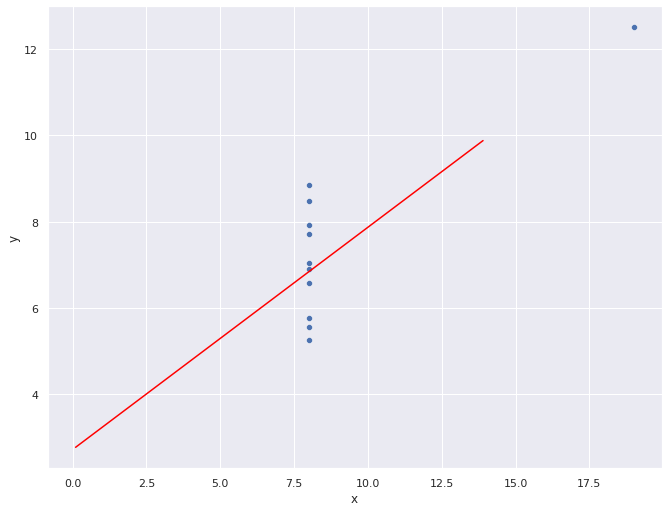

In [87]:
#grupo 4

X=df[mask_4][['x']]
y=df[mask_4]['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model_rl = LinearRegression() 
model_rl.fit(X_train, y_train)

beta_0 = round(model_rl.intercept_,2)
beta_1 = round(model_rl.coef_[0],2)

Y_predict = model_rl.predict(X_test)
Y_predict

beta_0 = model_rl.intercept_
beta_1 = model_rl.coef_[0]

df1=df[mask_4]

x_range = np.arange(0.1,14,0.1)
        
        
df1_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0 + beta_1*n for n in x_range]})
  
df1 = pd.DataFrame({'x':X['x'],
                           'y_true':y})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df1, ax=ax)
sns.lineplot(x='x', y='y_true', data=df1_plot,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [88]:
df1_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': model_rl.predict(X_test)
        }
)

df1_metrics = summary_metrics(df1_temp)
df1_metrics['r2'] =  round(r2_score(y_test, model_rl.predict(X_test)),4)
print('\nMetricas para el grupo 4:\n')
print(df1_metrics)


Metricas para el grupo 4:

      mae     mse    rmse    mape  maape   wmape   mmape   smape      r2
0  1.2605  1.6576  1.2875  0.1718   0.17  0.1708  0.1507  0.1766 -0.2148


In [ ]:
"""3) se obserba que cada recta obtenida por el modelo de regrecion lineal tiene la misma pendiente para todos los grupos"""

In [ ]:
"""4) """

In [ ]:
"""5. Es claro que el ajuste lineal para algunos grupos no es el correcto. 
Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). 
Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente 
otros modelos en los casos que encuentre necesario.""" 

"""R: se le puede reasignar un rango de valores permitidos para no tener datos extremadamente lejos de la mayoria de los otros
datos"""